In [1]:
import pandas as pd 

base = pd.read_csv('plano_saude.csv')

X = base.iloc[:, 0].values
Y = base.iloc[:, 1].values

Checar a correlação entre os coeficientes é um ótimo começo para saber se o algoritmo de regressão linear irá funcionar bem. Se a relação for próximo de 1 (correlação perfeita) significa que o algoritmo irá funcionar muito bem.

In [2]:
### Cheacando correlação
import numpy as np 
correlacao = np.corrcoef(X, Y)
correlacao

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [3]:
### Para que o algoritmo funcione, os valores de X devem estar isolados em um vetor com um elemento, para isso usaremos o método reshape(-1, 1) que transforma um vetor de uma dimensão em 1 vetor de 2 dimensões
X = X.reshape(-1, 1)

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
### Constante da reta (B_0)
regressor.intercept_

-558.9490909090912

In [6]:
### Coeficientes da reta (B1, B2, B3, ..., Bn)
regressor.coef_

array([61.86787879])

Text(0, 0.5, 'Custo')

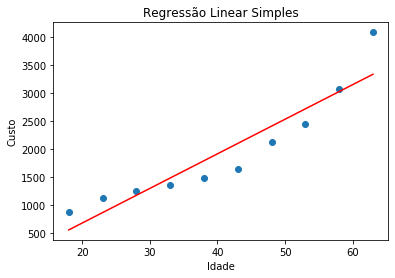

In [7]:
### Imprime o gráfico de dispersão com a linha de tendência
import matplotlib.pyplot as plt
plt.scatter(X, Y)
### Eixo X sendo as nossas variáveis X e o eixo Y sendo a predição da nossa variável X
plt.plot(X, regressor.predict(X), color = 'red')
### Alterando o título do nosso gráfico
plt.title('Regressão Linear Simples')
### Alterando o nome da variável X
plt.xlabel('Idade')
### Alterando o nome da variável Y
plt.ylabel('Custo')

In [11]:
### Fazendo uma previsão para alguém com idade de 40 anos
previsao1 = regressor.predict([[40]])
previsao1

array([1915.76606061])

In [12]:
### Calculando o valor do R²
score = regressor.score(X, Y)
score

0.8666112727879174

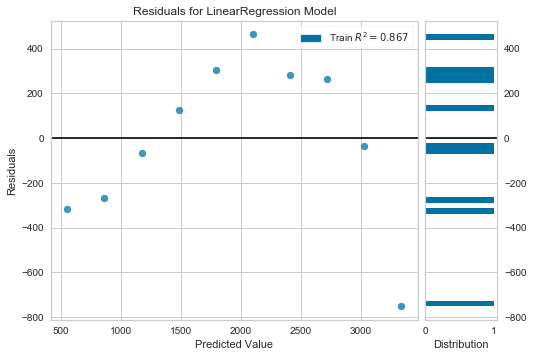

In [14]:
### Esta biblioteca imprime a distância de cada um dos pontos previstos para a reta
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor)
visualizador.fit(X, Y)
### Imprime o gráfico
visualizador.poof()